In [4]:
%load_ext sql
%sql sqlite:///train.db
import pandas as pd

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [6]:
chicago_socioeconomic_data = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql PERSIST chicago_socioeconomic_data
%sql SELECT * FROM chicago_socioeconomic_data limit 5

 * sqlite:///train.db
 * sqlite:///train.db
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [8]:
%sql select count(*) from chicago_socioeconomic_data

 * sqlite:///train.db
Done.


count(*)
78


In [15]:
livinch=chicago_socioeconomic_data
%sql select count(*) from chicago_socioeconomic_data where hardship_index>50

 * sqlite:///train.db
Done.


count(*)
38


In [21]:
%sql select max(hardship_index) from chicago_socioeconomic_data;
%sql select community_area_name from chicago_socioeconomic_data where hardship_index=(select max(hardship_index) from chicago_socioeconomic_data)

 * sqlite:///train.db
Done.
 * sqlite:///train.db
Done.


community_area_name
Riverdale


In [18]:
maxhi=%sql select max(hardship_index) from chicago_socioeconomic_data;
print(maxhi)

 * sqlite:///train.db
Done.
+---------------------+
| max(hardship_index) |
+---------------------+
|         98.0        |
+---------------------+


In [32]:
maxhi='%sql select max(hardship_index) from chicago_socioeconomic_data';
%sql select community_area_name from chicago_socioeconomic_data where hardship_index=:maxhi

 * sqlite:///train.db
Done.


community_area_name


In [33]:
%sql select community_area_name from chicago_socioeconomic_data where  per_capita_income_>60000

 * sqlite:///train.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


 * sqlite:///train.db
Done.


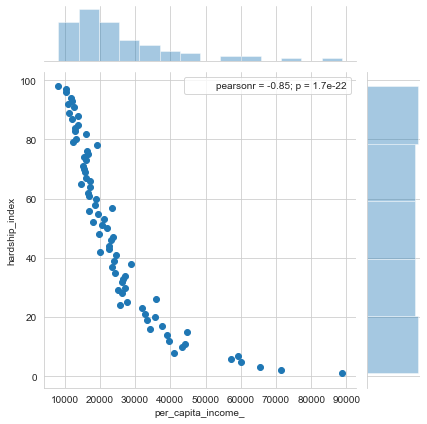

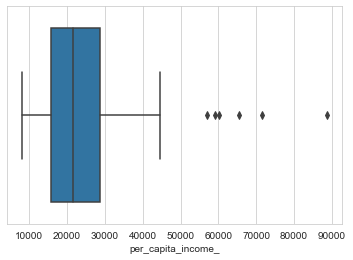

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())
plot.annotate(stats.pearsonr)
plt.show()

plot=sns.set_style("whitegrid")
ax=sns.boxplot(x=mydf["per_capita_income_"])

 * sqlite:///train.db
Done.


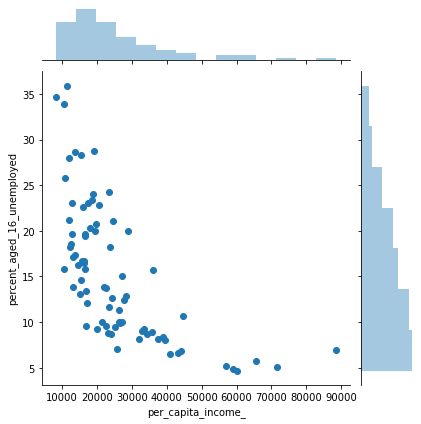

In [36]:
income_vs_hardship = %sql SELECT per_capita_income_, percent_aged_16_unemployed FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='percent_aged_16_unemployed', data=income_vs_hardship.DataFrame())

In [41]:
data=%sql SELECT * FROM chicago_socioeconomic_data;
data.DataFrame().describe(include='all')

 * sqlite:///train.db
Done.


,index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
count,78.000000,77.000000,78,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,77.000000
unique,NaN,NaN,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,East Garfield Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,38.500000,39.000000,NaN,4.920513,21.739744,15.341026,20.330769,35.717949,25597.000000,49.506494
std,22.660538,22.371857,NaN,3.658981,11.457231,7.499497,11.746514,7.284421,15196.405541,28.690556
min,0.000000,1.000000,NaN,0.300000,3.300000,4.700000,2.500000,13.500000,8201.000000,1.000000
25%,19.250000,20.000000,NaN,2.325000,13.350000,9.200000,12.075000,32.150000,15804.750000,25.000000
50%,38.500000,39.000000,NaN,3.850000,19.050000,13.850000,18.650000,38.050000,21668.500000,50.000000
75%,57.750000,58.000000,NaN,6.800000,29.150000,20.000000,26.600000,40.500000,28715.750000,74.000000


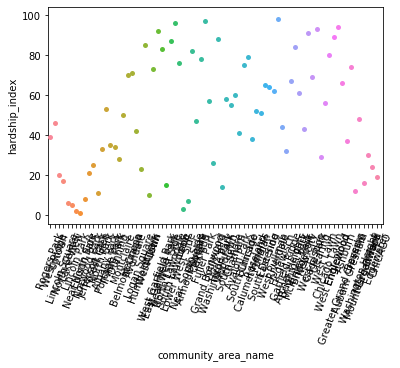

In [50]:
plot = sns.swarmplot(x='community_area_name',y='hardship_index', data=data.DataFrame())
plt.setp(plot.get_xticklabels(),rotation=70)
plt.show()

In [56]:
mydf=data.DataFrame()
#print(mydf)
mydf['per_capita_income_'].describe()

count       78.000000
mean     25597.000000
std      15196.405541
min       8201.000000
25%      15804.750000
50%      21668.500000
75%      28715.750000
max      88669.000000
Name: per_capita_income_, dtype: float64

In [59]:
mydf['per_capita_income_'].idxmax()

7

In [60]:
mydf.at[7,'community_area_name']

'Near North Side'

In [143]:
%sql select * from EMPLOYEES

 * sqlite:///train.db
Done.


EMP_ID,F_NAME,L_NAME,SSN,B_DATE,SEX,ADDRESS,JOB_ID,SALARY,MANAGER_ID,DEP_ID
E1001,John,Thomas,123456,1976-01-09,M,"5631 Rice, OakPark,IL",100,100000,30001,2
E1002,Alice,James,123457,1972-07-31,F,"980 Berry ln, Elgin,IL",200,80000,30002,5
E1003,Steve,Wells,123458,1980-08-10,M,"291 Springs, Gary,IL",300,50000,30002,5
E1004,Santosh,Kumar,123459,1985-07-20,M,"511 Aurora Av, Aurora,IL",400,60000,30004,5
E1005,Ahmed,Hussain,123410,1981-01-04,M,"216 Oak Tree, Geneva,IL",500,70000,30001,2
E1006,Nancy,Allen,123411,1978-02-06,F,"111 Green Pl, Elgin,IL",600,90000,30001,2
E1007,Mary,Thomas,123412,1975-05-05,F,"100 Rose Pl, Gary,IL",650,65000,30003,7
E1008,Bharath,Gupta,123413,1985-05-06,M,"145 Berry Ln, Naperville,IL",660,65000,30003,7
E1009,Andrea,Jones,123414,1990-07-09,F,"120 Fall Creek, Gary,IL",234,70000,30003,7
E1010,Ann,Jacob,123415,1982-03-30,F,"111 Britany Springs,Elgin,IL",220,70000,30004,5


In [80]:
%sql select e.F_name, e.l_name, j.start_date \
from employees e inner join job_history j \
on e.emp_id=j.empl_id where e.dep_id=5

 * sqlite:///train.db
Done.


F_NAME,L_NAME,START_DATE
Alice,James,08/01/2001
Steve,Wells,08/16/2001
Santosh,Kumar,08/16/2000
Ann,Jacob,08/16/2016


In [86]:
%sql select e.F_name, e.l_name, j.start_date, jo.job_title \
from employees e inner join job_history j \
on e.emp_id=j.empl_id \
inner join jobs jo on e.job_id=jo.job_ident \
where e.dep_id='5'

 * sqlite:///train.db
Done.


F_NAME,L_NAME,START_DATE,JOB_TITLE
Alice,James,08/01/2001,Sr. Software Developer
Steve,Wells,08/16/2001,Jr.Software Developer
Santosh,Kumar,08/16/2000,Jr.Software Developer
Ann,Jacob,08/16/2016,Sr. Designer


In [159]:
%sql select e.emp_id, e.l_name, j.dept_id_dep, j.dep_name \
from employees e left outer join departments j \
on e.dep_id=j.dept_id_dep \
where strftime('%Y', E.B_DATE)<'1980'

 * sqlite:///train.db
Done.


EMP_ID,L_NAME,DEPT_ID_DEP,DEP_NAME
E1001,Thomas,2,Architect Group
E1002,James,5,Software Group
E1002,James,5,Software Group
E1006,Allen,2,Architect Group
E1007,Thomas,7,Design Team


In [168]:
%%sql select E.EMP_ID,E.L_NAME,E.DEP_ID,D.DEP_NAME
	from EMPLOYEES AS E 
	LEFT OUTER JOIN DEPARTMENTS AS D ON E.DEP_ID=D.DEPT_ID_DEP 
	where strftime('%Y', E.B_DATE)<'1980'

 * sqlite:///train.db
Done.


EMP_ID,L_NAME,DEP_ID,DEP_NAME
E1001,Thomas,2,Architect Group
E1002,James,5,Software Group
E1002,James,5,Software Group
E1006,Allen,2,Architect Group
E1007,Thomas,7,Design Team


In [156]:
%sql select strftime('%Y', B_DATE) from employees

 * sqlite:///train.db
Done.


"strftime('%Y', B_DATE)"
1976
1972
1980
1985
1981
1978
1975
1985
1990
1982


In [158]:
%sql select B_DATE from employees where strftime('%Y', B_DATE)<'1980'

 * sqlite:///train.db
Done.


B_DATE
1976-01-09
1972-07-31
1978-02-06
1975-05-05


In [127]:
# must have!
# %sql UPDATE employees SET b_date = substr(b_date, 7, 4) || '-' || substr(b_date, 1,2) || '-' || substr(b_date, 4,2)

In [155]:
%sql select COUNT(*) from PETSALE where strftime('%m',SALEDATE)='06'

 * sqlite:///train.db
Done.


COUNT(*)
8


In [171]:
%sql select e.emp_id, e.l_name, j.dept_id_dep, j.dep_name \
from employees e left outer join departments j \
on e.dep_id=j.dept_id_dep \
AND strftime('%Y', E.B_DATE)<'1980'

 * sqlite:///train.db
Done.


EMP_ID,L_NAME,DEPT_ID_DEP,DEP_NAME
E1001,Thomas,2,Architect Group
E1002,James,5,Software Group
E1002,James,5,Software Group
E1003,Wells,None,None
E1004,Kumar,None,None
E1005,Hussain,None,None
E1006,Allen,2,Architect Group
E1007,Thomas,7,Design Team
E1008,Gupta,None,None
E1009,Jones,None,None


In [173]:
%sql select e.emp_id, e.l_name, j.dept_id_dep, j.dep_name \
from employees e full outer join departments j \
on e.dep_id=j.dept_id_dep

 * sqlite:///train.db
(sqlite3.OperationalError) RIGHT and FULL OUTER JOINs are not currently supported
[SQL: select e.emp_id, e.l_name, j.dept_id_dep, j.dep_name  from employees e full outer join departments j  on e.dep_id=j.dept_id_dep]
(Background on this error at: http://sqlalche.me/e/e3q8)
